---
title: "Variational Autoencoder"
description: |
  Part 1 in a 3 part series exploring generative deep learning models. The output is not very good at 256x256 pixel size images, so future projects may trade off lower resolution images for more sensical generative outputs. THe runtime was also far too long to properly iterate taking ~6 hours to run the full notebook. I may come back to this and explore smaller images.
author:
  - name: Jake Gehri
    url: {}
date: "2022-12-18"
categories: ["Python", "Deep Learning", "Computer Vision"]
image: VAE.png
format: 
  html:
    df-print: paged
    toc: true
engine: knitr
---

In [4]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73031 sha256=82ade304566070e4c486c5fef6449cb1e5734a5ddcd9c999935d23eeea0a2bff
  Stored in directory: /root/.cache/pip/wheels/ac/b2/c3/fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [ ]:
! pip install torchinfo

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
from PIL import Image
import glob
from torchvision.transforms import ToTensor, PILToTensor
import os
import pandas as pd
from torchvision.io import read_image
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torch.nn.functional as F
import time
from pathlib import Path
from torchvision.datasets import ImageFolder
from tqdm.auto import tqdm
import matplotlib.colors as mcolors
import numpy as np
from torchinfo import summary

In [9]:
creds = '{"username":"jakegehri","key":"41ff660454233a25221965d475c8d92b"}'

In [11]:
cred_path = Path('~/.kaggle/kaggle.json').expanduser() 

if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [12]:
import kaggle

In [ ]:
DEVICE = 'cuda'

# A simple dense nn autoencoder with MNIST

In [4]:
tensor_transform = transforms.ToTensor()

dataset = datasets.MNIST(root = "./data", train = True, download = True, transform = tensor_transform)
 
dataloader = torch.utils.data.DataLoader(dataset = dataset, batch_size = 32, shuffle = True)

In [5]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
        )

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [6]:
model = AE().to(DEVICE)

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 1e-1, weight_decay = 1e-8)

In [7]:
epochs = 50
outputs = []
losses = []
for epoch in tqdm(range(epochs)):
    for (image, _) in tqdm(dataloader):
       
        image = image.reshape(-1, 28*28).to(DEVICE)
       
        reconstructed = model(image)
       
        loss = loss_function(reconstructed, image)
       
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
       

        losses.append(loss.detach().cpu().numpy())
    outputs.append((epoch, image, reconstructed))


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

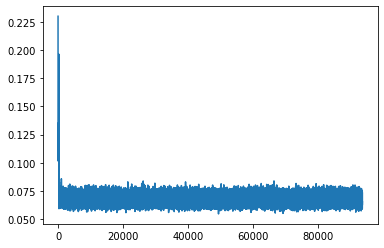

In [8]:
plt.plot(losses)

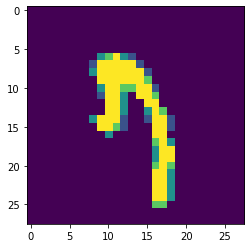

In [9]:
plt.imshow(image[0].reshape(-1, 28, 28).cpu().permute(1, 2, 0))

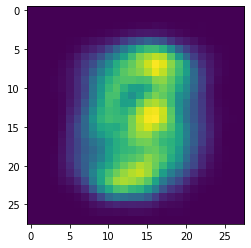

In [10]:
plt.imshow(reconstructed[0].detach().reshape(-1, 28, 28).cpu().permute(1, 2, 0))

# A conv autoencoder

In [11]:
class Reshape(nn.Module):
    def __init__(self, *args):
        super().__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)


class Trim(nn.Module):
    def __init__(self, *args):
        super().__init__()

    def forward(self, x):
        return x[:, :, :28, :28]


class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential( #784
                nn.Conv2d(1, 32, stride=(1, 1), kernel_size=(3, 3), padding=1),
                nn.LeakyReLU(0.01),
                nn.Conv2d(32, 64, stride=(2, 2), kernel_size=(3, 3), padding=1),
                nn.LeakyReLU(0.01),
                nn.Conv2d(64, 64, stride=(2, 2), kernel_size=(3, 3), padding=1),
                nn.LeakyReLU(0.01),
                nn.Conv2d(64, 64, stride=(1, 1), kernel_size=(3, 3), padding=1),
                nn.Flatten(),
                nn.Linear(3136, 2)
        )
        self.decoder = nn.Sequential(
                torch.nn.Linear(2, 3136),
                Reshape(-1, 64, 7, 7),
                nn.ConvTranspose2d(64, 64, stride=(1, 1), kernel_size=(3, 3), padding=1),
                nn.LeakyReLU(0.01),
                nn.ConvTranspose2d(64, 64, stride=(2, 2), kernel_size=(3, 3), padding=1),                
                nn.LeakyReLU(0.01),
                nn.ConvTranspose2d(64, 32, stride=(2, 2), kernel_size=(3, 3), padding=0),                
                nn.LeakyReLU(0.01),
                nn.ConvTranspose2d(32, 1, stride=(1, 1), kernel_size=(3, 3), padding=0), 
                Trim(),  # 1x29x29 -> 1x28x28
                nn.Sigmoid()
                )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [12]:
model2 = AutoEncoder().to(DEVICE)
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters(), lr = 0.0005, weight_decay = 1e-8)

In [28]:
epochs = 50
outputs = []
losses = []
for epoch in tqdm(range(epochs)):
    for (image, _) in tqdm(dataloader):
       
        image = image.to(DEVICE)
       
        reconstructed = model2(image)
       
        loss = loss_function(reconstructed, image)
       
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
       

        losses.append(loss.detach().cpu().numpy())
    outputs.append((epochs, image, reconstructed))

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

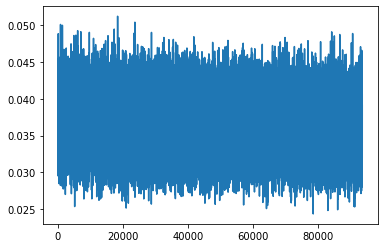

In [29]:
plt.plot(losses)

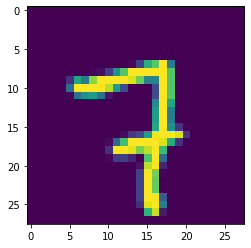

In [30]:
plt.imshow(image[1].reshape(-1, 28, 28).cpu().permute(1, 2, 0))

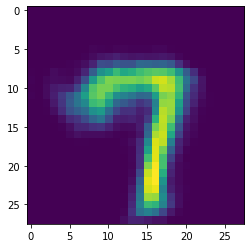

In [31]:
plt.imshow(reconstructed[1].detach().reshape(-1, 28, 28).cpu().permute(1, 2, 0))

In [32]:
def plot_latent_space_with_labels(num_classes, data_loader, model, device):
    d = {i:[] for i in range(num_classes)}

    model.eval()
    with torch.no_grad():
        for i, (features, targets) in enumerate(data_loader):

            features = features.to(device)
            targets = targets.to(device)
            
            embedding = model.encoder(features)

            for i in range(num_classes):
                if i in targets:
                    mask = targets == i
                    d[i].append(embedding[mask].to('cpu').numpy())

    colors = list(mcolors.TABLEAU_COLORS.items())
    for i in range(num_classes):
        d[i] = np.concatenate(d[i])
        plt.scatter(
            d[i][:, 0], d[i][:, 1],
            color=colors[i][1],
            label=f'{i}',
            alpha=0.5)

    plt.legend()

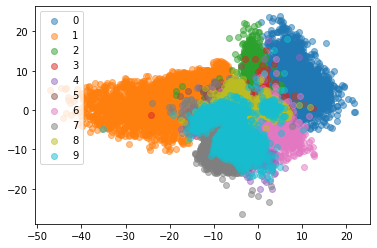

In [33]:
plot_latent_space_with_labels(
    num_classes=10,
    data_loader=dataloader,
    model=model2, 
    device=DEVICE)

plt.legend()
plt.show()

# Load and prepare data

In [34]:
coast_image_list = []
for filename in glob.glob('Landscape Classification/Landscape Classification/Training Data/Coast/*.jpeg'):
    im=Image.open(filename)
    coast_image_list.append(im)

In [35]:
labels = ['Coast', 'Desert', 'Forest', 'Glacier', 'Mountain']

In [36]:
len(coast_image_list)

2000

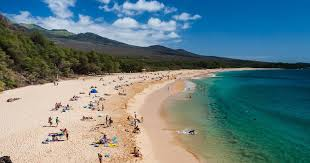

In [37]:
coast_image_list[6]

In [38]:
image = ToTensor()(coast_image_list[0])
image, image.shape

(tensor([[[0.8745, 0.8745, 0.8745,  ..., 0.7608, 0.7608, 0.7608],
          [0.8745, 0.8745, 0.8745,  ..., 0.7608, 0.7608, 0.7608],
          [0.8784, 0.8784, 0.8784,  ..., 0.7608, 0.7608, 0.7608],
          ...,
          [0.4235, 0.4863, 0.5765,  ..., 0.4980, 0.4392, 0.4275],
          [0.5255, 0.5098, 0.5216,  ..., 0.6588, 0.5725, 0.6000],
          [0.6510, 0.4706, 0.4118,  ..., 0.5608, 0.5529, 0.7216]],
 
         [[0.8824, 0.8824, 0.8824,  ..., 0.8000, 0.8000, 0.8000],
          [0.8824, 0.8824, 0.8824,  ..., 0.8000, 0.8000, 0.8000],
          [0.8863, 0.8863, 0.8863,  ..., 0.8000, 0.8000, 0.8000],
          ...,
          [0.2863, 0.3490, 0.4392,  ..., 0.3294, 0.2706, 0.2588],
          [0.3882, 0.3725, 0.3843,  ..., 0.4902, 0.4039, 0.4314],
          [0.5137, 0.3333, 0.2745,  ..., 0.3922, 0.3843, 0.5529]],
 
         [[0.8784, 0.8784, 0.8784,  ..., 0.8353, 0.8353, 0.8353],
          [0.8784, 0.8784, 0.8784,  ..., 0.8353, 0.8353, 0.8353],
          [0.8824, 0.8824, 0.8824,  ...,

In [39]:
transform = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(256),
                                 transforms.ToTensor()])

In [40]:
dataset = ImageFolder(root = 'Landscape Classification/Landscape Classification/Training Data/', transform=transform)

In [41]:
dataset[0][0]

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.8784, 0.8667, 0.8510],
         [0.0000, 0.0000, 0.0000,  ..., 0.8588, 0.8471, 0.8353],
         [0.0000, 0.0000, 0.0039,  ..., 0.8392, 0.8275, 0.8157],
         ...,
         [0.8549, 0.8471, 0.8431,  ..., 0.8118, 0.7961, 0.7843],
         [0.8392, 0.8471, 0.8588,  ..., 0.8549, 0.8314, 0.8078],
         [0.8275, 0.8471, 0.8784,  ..., 0.8824, 0.8588, 0.8314]],

        [[0.5843, 0.5843, 0.5804,  ..., 0.9333, 0.9137, 0.8902],
         [0.5804, 0.5804, 0.5765,  ..., 0.9137, 0.8980, 0.8784],
         [0.5804, 0.5804, 0.5765,  ..., 0.8941, 0.8784, 0.8627],
         ...,
         [0.8196, 0.8157, 0.8157,  ..., 0.7961, 0.7804, 0.7647],
         [0.8039, 0.8157, 0.8314,  ..., 0.8392, 0.8118, 0.7882],
         [0.7922, 0.8157, 0.8510,  ..., 0.8667, 0.8392, 0.8118]],

        [[0.7686, 0.7725, 0.7765,  ..., 0.9765, 0.9569, 0.9373],
         [0.7686, 0.7725, 0.7765,  ..., 0.9569, 0.9412, 0.9255],
         [0.7725, 0.7725, 0.7765,  ..., 0.9373, 0.9255, 0.

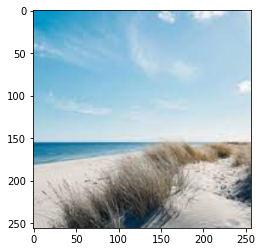

In [42]:
plt.imshow(dataset[0][0].permute(1, 2, 0).numpy())

In [43]:
batch_size = 32

In [44]:
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [45]:
im = next(iter(dataloader))

In [46]:
im[0].shape

torch.Size([32, 3, 256, 256])

In [47]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((images.detach()[:nmax]), nrow=8).permute(1, 2, 0))
def show_batch(dl, nmax=64):
    for images in dl:
        show_images(images[0], nmax)
        break

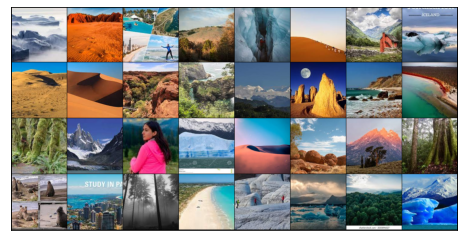

In [48]:
show_batch(dataloader)

# Build Autoencoder

In [49]:
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
                nn.Conv2d(3, 32, stride=2, kernel_size=3, padding=1), # 64 -> 32
                nn.BatchNorm2d(32),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.Conv2d(32, 32, kernel_size=3, padding=1),
                nn.BatchNorm2d(32),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.Conv2d(32, 32, kernel_size=3, padding=1),
                nn.BatchNorm2d(32),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.Conv2d(32, 64, stride=2, kernel_size=3, padding=1), # 32 -> 16
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.Conv2d(64, 64, kernel_size=3, padding=1),
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.Conv2d(64, 64, stride=2 ,kernel_size=3, padding=1), #16 -> 8
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.Flatten(),
                nn.Linear(65536, 384)
        )
        
    def forward(self, x):
        return self.encoder(x)

In [50]:
X = next(iter(dataloader))[0]
enc = Encoder()
z = enc(X)
X.shape, z.shape

(torch.Size([32, 3, 256, 256]), torch.Size([32, 384]))

In [ ]:
class Reshape(nn.Module):
    def __init__(self, *args):
        super().__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)

In [ ]:
class Trim(nn.Module):
    def __init__(self, *args):
        super().__init__()

    def forward(self, x):
        return x[:, :, :256, :256]

In [53]:
class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
                nn.Linear(384, 65536),
                nn.LeakyReLU(0.01),
                )
        
        self.decoder = nn.Sequential(
                nn.ConvTranspose2d(64, 64, stride=2, kernel_size=3, padding=1, output_padding=1),
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.ConvTranspose2d(64, 64, stride=1, kernel_size=3, padding=1),               
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.ConvTranspose2d(64, 32, stride=2, kernel_size=3, padding=1, output_padding=1),                
                nn.BatchNorm2d(32),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.ConvTranspose2d(32, 32, stride=1, kernel_size=3, padding=1),     
                nn.BatchNorm2d(32),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.ConvTranspose2d(32, 32, stride=1, kernel_size=3, padding=1),     
                nn.BatchNorm2d(32),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.ConvTranspose2d(32, 3, stride = 2, kernel_size=3, padding=1, output_padding=1), 
                Trim(),
                nn.Sigmoid()
                )
            
    def forward(self, z):
        z = self.linear(z)
        z = torch.reshape(z, (-1, 64, 32, 32))
        z = self.decoder(z)
        return z

In [54]:
decoder = Decoder()
X_prime = decoder(z)

In [55]:
X.shape, X_prime.shape

(torch.Size([32, 3, 256, 256]), torch.Size([32, 3, 256, 256]))

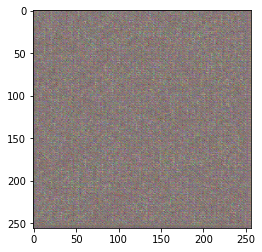

In [56]:
plt.imshow(X_prime[0].cpu().permute(1, 2, 0).detach().numpy())

In [57]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = Encoder()
        self.decoder = Decoder()
        
    def forward(self, x):
        return self.decoder(self.encoder(x))

In [58]:
ae = Autoencoder().to(DEVICE)
loss_fn = F.mse_loss
optimizer = torch.optim.Adam(params=ae.parameters(), lr=0.0005)

In [59]:
summary(ae, (batch_size, 3, 256, 256))

Layer (type:depth-idx)                   Output Shape              Param #
Autoencoder                              [32, 3, 256, 256]         --
├─Encoder: 1-1                           [32, 384]                 --
│    └─Sequential: 2-1                   [32, 384]                 --
│    │    └─Conv2d: 3-1                  [32, 32, 128, 128]        896
│    │    └─BatchNorm2d: 3-2             [32, 32, 128, 128]        64
│    │    └─LeakyReLU: 3-3               [32, 32, 128, 128]        --
│    │    └─Dropout2d: 3-4               [32, 32, 128, 128]        --
│    │    └─Conv2d: 3-5                  [32, 32, 128, 128]        9,248
│    │    └─BatchNorm2d: 3-6             [32, 32, 128, 128]        64
│    │    └─LeakyReLU: 3-7               [32, 32, 128, 128]        --
│    │    └─Dropout2d: 3-8               [32, 32, 128, 128]        --
│    │    └─Conv2d: 3-9                  [32, 32, 128, 128]        9,248
│    │    └─BatchNorm2d: 3-10            [32, 32, 128, 128]        64
│    │  

In [60]:
epochs = 100
outputs = []
losses = []
for epoch in tqdm(range(epochs)):
    for batch, (image, _) in tqdm(enumerate(dataloader)):
        
        image = image.to(DEVICE)
       
        reconstructed = ae(image)
        
        loss = loss_fn(reconstructed, image, reduction = 'none')
        loss = loss.view(batch_size, -1).sum(axis=1)
        loss = loss.mean()
       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
       

        losses.append(loss.detach().cpu().numpy())
    outputs.append((epoch, image, reconstructed))

  0%|          | 0/100 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

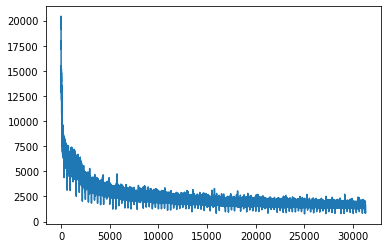

In [61]:
plt.plot(losses)

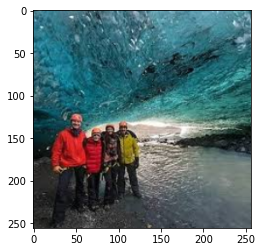

In [62]:
plt.imshow(image[5].reshape(-1, 256, 256).cpu().permute(1, 2, 0))

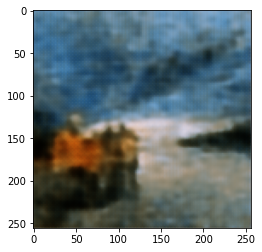

In [63]:
plt.imshow(reconstructed[5].detach().reshape(-1, 256, 256).cpu().permute(1, 2, 0))

# Variational Autoencoder

In [ ]:
class VAE(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential(
                nn.Conv2d(3, 32, stride=2, kernel_size=3, padding=1), # 64 -> 32
                nn.BatchNorm2d(32),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.Conv2d(32, 32, kernel_size=3, padding=1),
                nn.BatchNorm2d(32),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.Conv2d(32, 32, kernel_size=3, padding=1),
                nn.BatchNorm2d(32),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.Conv2d(32, 64, stride=2, kernel_size=3, padding=1), # 32 -> 16
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.Conv2d(64, 64, kernel_size=3, padding=1),
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.Conv2d(64, 64, stride=2 ,kernel_size=3, padding=1), #16 -> 8
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.Flatten(),
        )
        
        self.z_mean = nn.Linear(65536, 384)
        self.z_log_var = nn.Linear(65536, 384)
        
        self.decoder = nn.Sequential(
                nn.Linear(384, 65536),
                Reshape(-1, 64, 32, 32),
                nn.ConvTranspose2d(64, 64, stride=2, kernel_size=3, padding=1, output_padding=1),
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.ConvTranspose2d(64, 64, stride=1, kernel_size=3, padding=1),               
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.ConvTranspose2d(64, 32, stride=2, kernel_size=3, padding=1, output_padding=1),                
                nn.BatchNorm2d(32),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.ConvTranspose2d(32, 32, stride=1, kernel_size=3, padding=1),     
                nn.BatchNorm2d(32),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.ConvTranspose2d(32, 32, stride=1, kernel_size=3, padding=1),     
                nn.BatchNorm2d(32),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                nn.ConvTranspose2d(32, 3, stride = 2, kernel_size=3, padding=1, output_padding=1), 
                #Trim(),
                nn.Sigmoid()
                )
    
    def reparameterize(self, z_mu, z_log_var):
        eps = torch.randn(z_mu.size(0), z_mu.size(1)).to(z_mu.get_device())
        z = z_mu + eps * torch.exp(z_log_var/2.) 
        return z
        
    def forward(self, x):
        x = self.encoder(x)
        z_mean, z_log_var = self.z_mean(x), self.z_log_var(x)
        encoded = self.reparameterize(z_mean, z_log_var)
        decoded = self.decoder(encoded)
        return z_mean, z_log_var, decoded
        

In [ ]:
vae = VAE()
vae.to(DEVICE)
reconstruction_loss_fn = F.mse_loss

optimizer = torch.optim.Adam(params=vae.parameters(), lr=0.000005)

In [ ]:
summary(vae, (32, 3, 256, 256))

In [ ]:
epochs = 100
outputs = []
combined_losses = []
reconstruction_losses = []
kl_losses = []

for epoch in tqdm(range(epochs)):
    for batch, (image, _) in tqdm(enumerate(dataloader)):
        
        image = image.to(DEVICE)
       
        z_mean, z_var, decoded = vae(image)
        
        kl_div = -0.5 * torch.sum(1 + z_var - z_mean**2 - torch.exp(z_var), axis=1)
        batch_size = kl_div.size(0)
        kl_div = kl_div.mean()
        
        reconstruction_loss = reconstruction_loss_fn(decoded, image, reduction = 'none')
        reconstruction_loss = reconstruction_loss.view(batch_size, -1).sum(axis=1)
        reconstruction_loss = reconstruction_loss.mean()
        
        loss = reconstruction_loss + 6*kl_div
       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        combined_losses.append(loss.detach().cpu().numpy())
        reconstruction_losses.append(reconstruction_loss.detach().cpu().numpy())
        kl_losses.append(kl_div.detach().cpu().numpy())
    print(decoded[0][0][0][0])
    outputs.append((epoch, image, decoded))

  0%|          | 0/100 [00:00<?, ?it/s]

0it [00:00, ?it/s]

tensor(0.5076, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5259, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4997, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5177, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4955, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4709, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5553, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5278, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4648, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5306, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5222, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5718, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4978, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4780, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3958, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4331, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4620, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5075, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5052, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5506, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5319, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5916, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4979, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4509, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3755, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3558, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4306, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4929, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4202, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5338, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3245, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4747, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5696, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.6361, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3472, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5908, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3509, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3180, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4775, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5667, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5338, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5143, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4723, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5900, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4791, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3529, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5084, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4630, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3603, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4525, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4273, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4500, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3048, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.6816, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5111, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4580, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3911, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3881, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3359, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.6996, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3950, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.6356, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4322, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4322, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4589, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.6863, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5958, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5642, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.6365, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3199, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4818, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5638, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.6218, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3410, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4855, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3236, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.2622, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3319, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5445, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.7014, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4964, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5029, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5056, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.2993, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3732, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5059, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3766, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5603, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5496, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5969, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.3564, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.5545, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4687, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4637, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4060, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

tensor(0.4188, device='cuda:0', grad_fn=<SelectBackward0>)


0it [00:00, ?it/s]

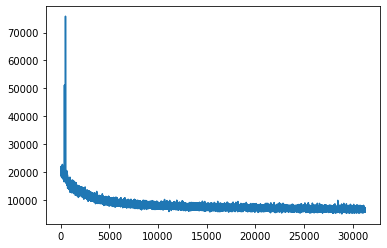

In [23]:
plt.plot(combined_losses)

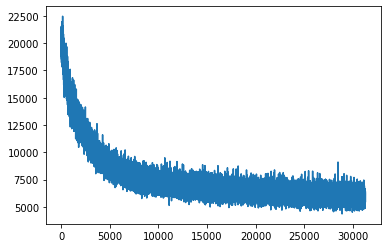

In [29]:
plt.plot(reconstruction_losses)

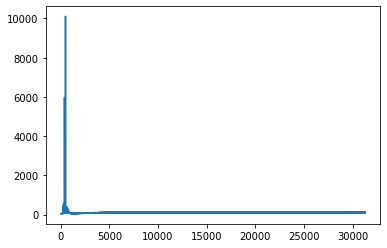

In [30]:
plt.plot(kl_losses)

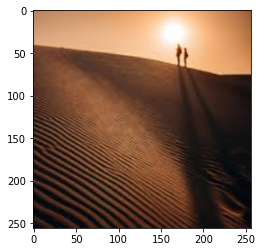

In [46]:
plt.imshow(image[10].reshape(-1, 256, 256).cpu().permute(1, 2, 0))

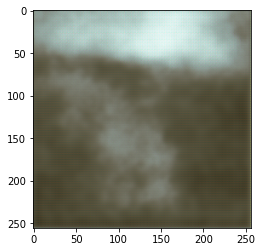

In [45]:
plt.imshow(decoded[10].detach().reshape(-1, 256, 256).cpu().permute(1, 2, 0))

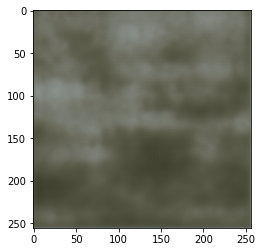

In [47]:
sample = torch.rand(384).to(DEVICE)
sample.shape

vae.eval()
sample_out = vae.decoder(sample)
plt.imshow(sample_out.detach().reshape(-1, 256, 256).cpu().permute(1, 2, 0))